In [34]:
# !pip install numpy matplotlib

In [36]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"

In [17]:
class BernoulliBandit():
    def __init__(self, K, success_probs):
        self.K = K
        self.success_probs = success_probs
        self.optimal = np.argmax(success_probs)
        self.optimal_prob = np.max(success_probs)
    
    def pullArm(self, k):
        return np.random.rand() < self.success_probs[k]
    
    def regret(self, choices):
        T = np.sum(choices)
        return T * self.optimal_prob - np.sum( [n_k*self.success_probs[k] for k, n_k in enumerate(choices)] )


In [18]:
class FollowTheLeader():
    def __init__(self, K):
        self.K = K                      # Number of arms
        self.choices = np.zeros(K)      # Number of times each arm was chosen
        self.cumulator = np.zeros(K)    # Cumulative reward for each arm
        self.t = 0
    
    def update(self, k, reward):
        self.t += 1
        self.choices[k] += 1
        self.cumulator[k] += reward
    
    def chooseArm(self):
        if self.t < self.K:
            return self.t
        else:
            return np.argmax(self.cumulator/self.choices)

In [31]:
regret = []
for i in range(1000):
    bb = BernoulliBandit(2, [0.5, 0.6])
    ftl = FollowTheLeader(2)
    T = 100
    for t in range(T):
        k = ftl.chooseArm()
        reward = bb.pullArm(k)
        ftl.update(k, reward)

    regret.append( bb.regret(ftl.choices) )

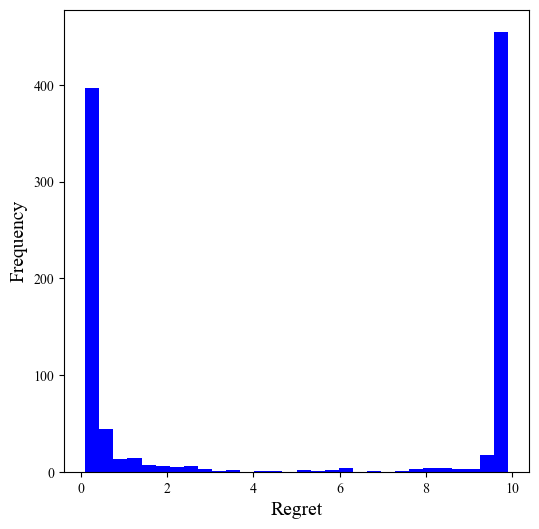

In [40]:
path = "./figs/"
fname = "part1question1c"

plt.figure( figsize=(6,6) )
plt.hist(regret, bins=30, color='blue', density=False)
plt.xlabel("Regret", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.savefig( path + fname + ".png", dpi=300, bbox_inches='tight' )
plt.show()

In [42]:
maxT = 1000
repeat = 100

mean_regret = []
for T in range(1, maxT+1):
    regret = []
    for i in range(repeat):
        print("T: {:4d}/{} -- Repetition: {:4d}/{}".format(T, maxT, i+1, repeat), end='\r')
        bb = BernoulliBandit(2, [0.5, 0.6])
        ftl = FollowTheLeader(2)
        for t in range(T):
            k = ftl.chooseArm()
            reward = bb.pullArm(k)
            ftl.update(k, reward)

        regret.append( bb.regret(ftl.choices) )
    mean_regret.append( np.mean(regret) )

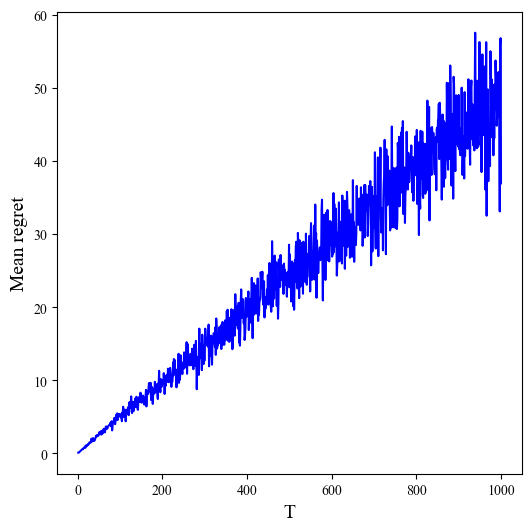

In [43]:
path = "./figs/"
fname = "part1question1d"

plt.figure( figsize=(6,6) )
plt.plot( np.arange(1, 1000+1), mean_regret, color='blue' )
plt.xlabel("T", fontsize=14)
plt.ylabel("Mean regret", fontsize=14)
plt.savefig( path + fname + ".png", dpi=300, bbox_inches='tight' )
plt.show()